## Example of reading in TESS light curve data based on simulated data

In [1]:
from imports import *
%matplotlib inline

In [2]:
# get data
hdu = fits.open('ETE-6/tid/00/000/057/tess2019128220341-0000000005733076-0016-s_lc.fits')
hdu[0].header

SIMPLE  =                    T / conforms to FITS standards                     
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T / file contains extensions                       
NEXTEND =                    2 / number of standard extensions                  
EXTNAME = 'PRIMARY '           / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
ORIGIN  = 'NASA/Ames'          / institution responsible for creating this file 
DATE    = '2017-11-21'         / file creation date.                            
DATE-OBS= '2019-05-08T22:03:41.757Z' / TSTART as UTC calendar date              
DATE-END= '2019-06-07T10:10:50.816Z' / TSTOP as UTC calendar date               
CREATOR = '1541 LightCurveExporterPipelineModule' / pipeline job and program use
PROCVER = 'spoc-3.1.17-20171

In [3]:
# get time-series
print hdu[1].columns
t, f, ef = hdu[1].data['TIME'], hdu[1].data['SAP_FLUX'], hdu[1].data['SAP_FLUX_ERR']
f2, ef2 = hdu[1].data['PDCSAP_FLUX'], hdu[1].data['PDCSAP_FLUX_ERR']
g = np.isfinite(t) & np.isfinite(f) & np.isfinite(ef)
g2 = np.isfinite(t) & np.isfinite(f2) & np.isfinite(ef2)

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'SAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'PSF_CENTR1'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR1_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'PSF_CENTR2'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR2_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'MOM_CENTR1'; format = 'D'; u

(<matplotlib.text.Text at 0x1a1548d450>,
 <matplotlib.text.Text at 0x1a18bb9190>)

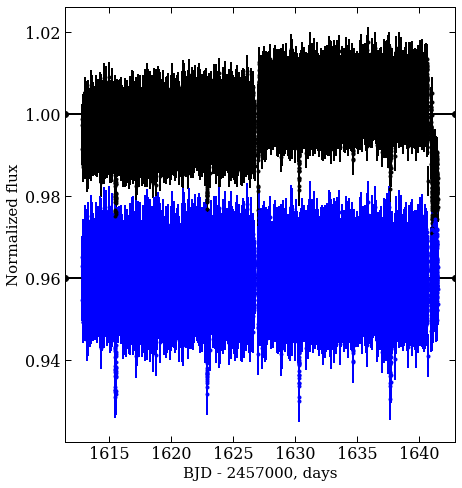

In [6]:
plt.figure(figsize=(7,8))
norm, norm2 = np.median(f[g]), np.median(f2[g2])
plt.errorbar(t, f/norm, ef/norm, fmt='k.'), plt.axhline(1)
offset = .04
plt.errorbar(t, f2/norm2-offset, ef2/norm2, fmt='b.'), plt.axhline(1-offset)
plt.xlabel('BJD - 2457000, days'), plt.ylabel('Normalized flux')
#plt.xlim((1620,1622))

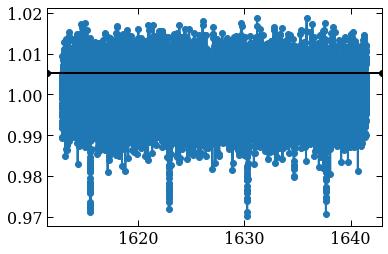

In [12]:
plt.plot(t, f2/norm2)
plt.axhline(1+np.median(ef2/norm2))

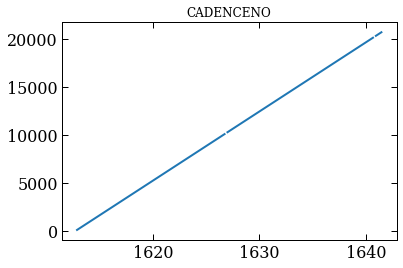

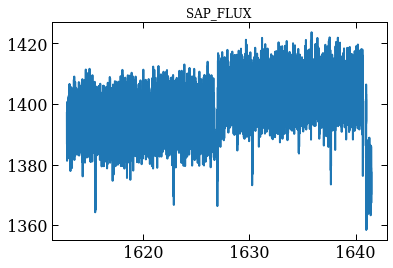

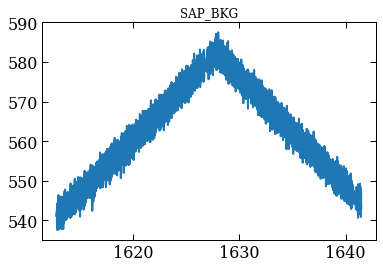

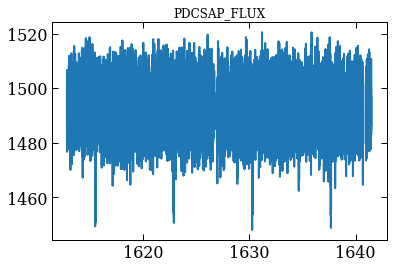

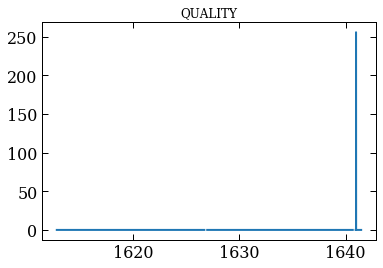

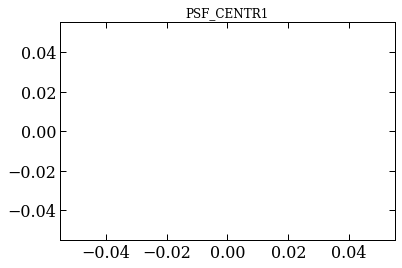

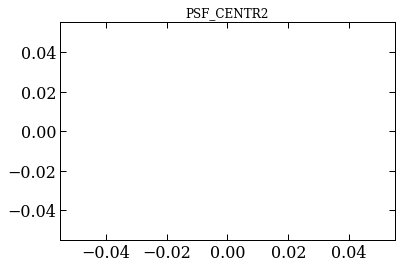

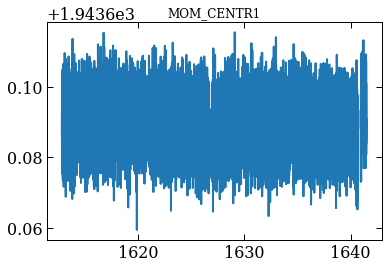

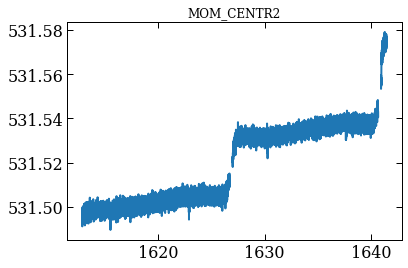

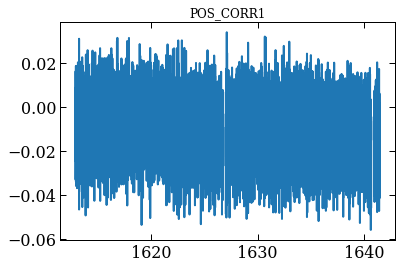

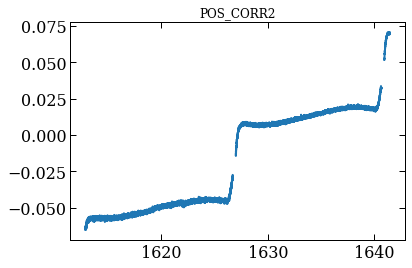

In [62]:
for i in range(2,len(hdu[1].data.names)):
    name = hdu[1].data.names[i]
    if 'ERR' not in name:
        plt.figure(i)
        plt.plot(t, hdu[1].data[name], '-')
        plt.title(name)

<Container object of 3 artists>

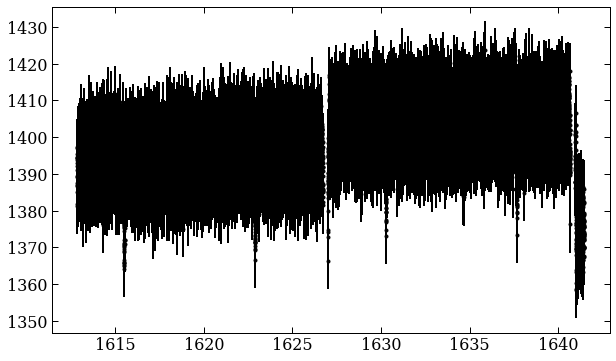

In [64]:
plt.figure(figsize=(10,6))
plt.errorbar(t[g2], f[g2], ef2[g2], fmt='k.')